In [1]:
import tifffile as tf 
import zarr 
import palom
# import pillow
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.spatial import ConvexHull, Delaunay
import pickle
import os
import time
# import torch
# import torch.nn as nn
from tqdm.auto import tqdm
import numpy as np
import tifffile as tf
import zarr
import dask.array as da
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import cellcutter
import cellcutter.cli
from numcodecs import Blosc
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [2]:
CSV_PATH = '/Users/swarchol/Research/seal/data/astro/objects.csv'

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/swarchol/mambaforge/envs/jupyter/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/swarchol/mambaforge/envs/jupyter/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/swarchol/m

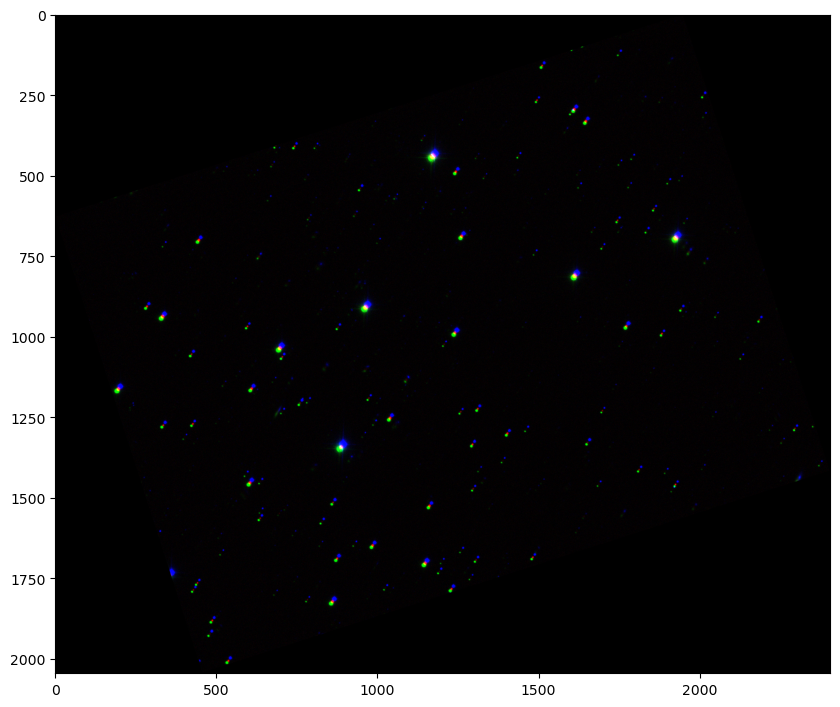

In [3]:

df = pd.read_csv(CSV_PATH)
features = df
# load numpy arrays and stack them
image_channels = np.stack([np.load(f'/Users/swarchol/Research/seal/data/astro/filter-{feature}.npy') for feature in ['u', 'g', 'r', 'i', 'z']])
fig, axs = plt.subplots(1, 1, figsize=(10, 20))
# visualize first 3 channels as rgb
first_3_channels = image_channels[0:3, :, :]
# # flip so channels are last
# first_3_channels = np.transpose(first_3_channels, (1, 2, 0))
# axs.imshow(first_3_channels)

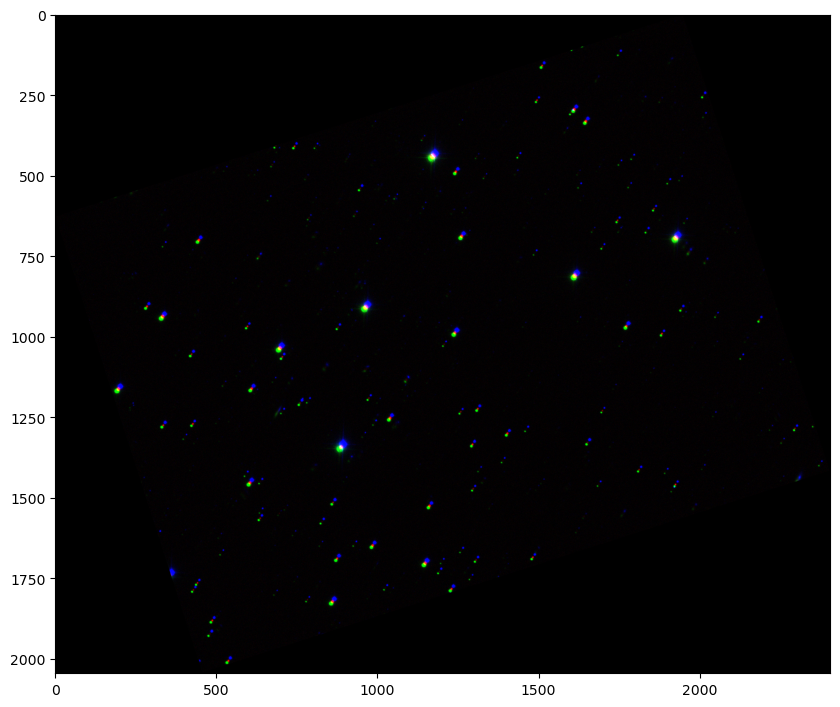

In [ ]:
# # Visualize each image feature as a subplot

# for i in range(5):
#     axs[i].imshow(image_features[i, :, :])
# plt.show()



In [4]:

image_array = image_channels
# plot the first 100 channels



In [66]:
df

objid   run  rerun  camcol  field   obj  type          ra  \
0    1237651212288720902  1336    301       3     77     6     6  260.097556   
1    1237651212288720905  1336    301       3     77     9     6  260.034837   
2    1237651212288720906  1336    301       3     77    10     6  260.048734   
3    1237651212288720907  1336    301       3     77    11     6  260.027857   
4    1237651212288720908  1336    301       3     77    12     6  260.038059   
..                   ...   ...    ...     ...    ...   ...   ...         ...   
614  1237651225710559756  1339    301       4     78   524     3  260.242176   
615  1237651225710559779  1339    301       4     78   547     6  260.268424   
616  1237651225710559800  1339    301       4     78   568     6  260.250528   
617  1237651225710559801  1339    301       4     78   569     6  260.265027   
618  1237651225710560254  1339    301       4     78  1022     6  260.271909   

           dec         u         g         r         i         z     Err_u  \
0    55.411202  19.07824  18.13483  17.79178  17.66343  17.61553  0.020276   
1    55.392044  14.87881  14.93651  14.35603  11.57173  13.14753  0.006695   
2    55.386783  17.31924  15.95297  15.44840  15.24186  15.14757  0.008137   
3    55.386657  23.95996  22.14378  20.36258  18.93841  18.16995  0.731148   
4    55.395994  23.73612  24.96242  22.66880  22.43886  19.28925  1.456069   
..         ...       ...       ...       ...       ...       ...       ...   
614  55.340507  22.83575  21.29050  20.19214  19.80217  19.50268  0.396110   
615  55.333571  24.00519  21.66579  20.41052  19.81752  19.47749  0.626628   
616  55.322353  22.66847  21.30665  20.59706  20.29827  19.85588  0.262035   
617  55.325060  23.76940  21.82874  20.57738  20.01763  19.61619  0.551900   
618  55.283360  24.89220  23.45769  21.76328  20.72503  20.12652  0.716520   

        Err_g     Err_r     Err_i     Err_z  temp_index  
0    0.005860  0.005769  0.006511  0.017307           1  
1    0.009857  0.008572  0.001381  0.007471           2  
2    0.003261  0.003405  0.003420  0.004900           3  
3    0.083746  0.029092  0.014071  0.026140           4  
4    0.576338  0.185996  0.239250  0.082442           5  
..        ...       ...       ...       ...         ...  
614  0.049910  0.030610  0.031856  0.106464        1583  
615  0.051665  0.027581  0.023445  0.071741        1584  
616  0.040299  0.033250  0.035865  0.106556        1585  
617  0.058461  0.031334  0.027191  0.081145        1586  
618  0.232040  0.084628  0.048879  0.130993        1601  

[619 rows x 20 columns]

In [5]:
seg_masks = np.load('/Users/swarchol/Research/seal/data/astro/seg_masks.npy')

In [6]:
seg_masks.shape

(2045, 2406)

In [7]:
df['CellID'] = df['temp_index']
df = features.drop(columns=['temp_index'])
df['X_centroid'] = 0
df['Y_centroid'] = 0




In [8]:
cell_ids = df['CellID'].unique()
missing_cell_ids = []
# Remove cellId == 1378 from features

cell_ids = df['CellID'].unique()
for cell_id in cell_ids:
    row = df[df['CellID'] == cell_id]
    # Find indicies in seg_masks that are equal to cell_id
    cell_mask = seg_masks == cell_id
    # Check if cellid is not in seg_masks
    if cell_id not in seg_masks:
        print(f"CellID {cell_id} not in seg_masks")
        missing_cell_ids.append(cell_id)
        continue

    # Find the centroid of the cell by the mean pixel coordinates
    centroid_x = np.mean(np.where(cell_mask)[1])
    centroid_y = np.mean(np.where(cell_mask)[0])
    
    


    features.loc[features['CellID'] == cell_id, 'X_centroid'] = centroid_x
    features.loc[features['CellID'] == cell_id, 'Y_centroid'] = centroid_y

features
features.to_csv('/Users/swarchol/Research/seal/data/astro/new_objects.csv', index=False)




In [72]:
features

objid   run  rerun  camcol  field   obj  type          ra  \
0    1237651212288720902  1336    301       3     77     6     6  260.097556   
1    1237651212288720905  1336    301       3     77     9     6  260.034837   
2    1237651212288720906  1336    301       3     77    10     6  260.048734   
3    1237651212288720907  1336    301       3     77    11     6  260.027857   
4    1237651212288720908  1336    301       3     77    12     6  260.038059   
..                   ...   ...    ...     ...    ...   ...   ...         ...   
614  1237651225710559756  1339    301       4     78   524     3  260.242176   
615  1237651225710559779  1339    301       4     78   547     6  260.268424   
616  1237651225710559800  1339    301       4     78   568     6  260.250528   
617  1237651225710559801  1339    301       4     78   569     6  260.265027   
618  1237651225710560254  1339    301       4     78  1022     6  260.271909   

           dec         u  ...         z     Err_u     Err_g     Err_r  \
0    55.411202  19.07824  ...  17.61553  0.020276  0.005860  0.005769   
1    55.392044  14.87881  ...  13.14753  0.006695  0.009857  0.008572   
2    55.386783  17.31924  ...  15.14757  0.008137  0.003261  0.003405   
3    55.386657  23.95996  ...  18.16995  0.731148  0.083746  0.029092   
4    55.395994  23.73612  ...  19.28925  1.456069  0.576338  0.185996   
..         ...       ...  ...       ...       ...       ...       ...   
614  55.340507  22.83575  ...  19.50268  0.396110  0.049910  0.030610   
615  55.333571  24.00519  ...  19.47749  0.626628  0.051665  0.027581   
616  55.322353  22.66847  ...  19.85588  0.262035  0.040299  0.033250   
617  55.325060  23.76940  ...  19.61619  0.551900  0.058461  0.031334   
618  55.283360  24.89220  ...  20.12652  0.716520  0.232040  0.084628   

        Err_i     Err_z  temp_index  CellID   X_centroid   Y_centroid  
0    0.006511  0.017307           1       1  1082.111111  1286.365079  
1    0.001381  0.007471           2       2   849.033364  1160.889713  
2    0.003420  0.004900           3       3   899.950311  1127.559006  
3    0.014071  0.026140           4       4   823.000000  1126.571429  
4    0.239250  0.082442           5       5   861.333333  1187.666667  
..        ...       ...         ...     ...          ...          ...  
614  0.031856  0.106464        1583    1583  1620.437500   824.625000  
615  0.023445  0.071741        1584    1584  1718.368421   778.789474  
616  0.035865  0.106556        1585    1585  1651.384615   705.615385  
617  0.027191  0.081145        1586    1586  1705.600000   723.600000  
618  0.048879  0.130993        1601    1601  1731.500000   450.500000  

[619 rows x 23 columns]

DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=40)
           2	RESUME(arg=0, lineno=40)
           4	LOAD_FAST(arg=0, lineno=53)
           6	LOAD_CONST(arg=1, lineno=53)
           8	BINARY_SUBSCR(arg=None, lineno=53)
          18	LOAD_CONST(arg=2, lineno=53)
          20	BINARY_OP(arg=1, lineno=53)
          24	LOAD_CONST(arg=3, lineno=53)
          26	BINARY_OP(arg=3, lineno=53)
          30	LOAD_CONST(arg=4, lineno=53)
          32	BINARY_OP(arg=1, lineno=53)
          36	LOAD_FAST(arg=0, lineno=54)
          38	LOAD_CONST(arg=1, lineno=54)
          40	BINARY_SUBSCR(arg=None, lineno=54)
          50	LOAD_CONST(arg=5, lineno=54)
          52	BINARY_OP(arg=3, lineno=54)
          56	LOAD_CONST(arg=4, lineno=54)
          58	BINARY_OP(arg=1, lineno=54)
          62	LOAD_FAST(arg=0, lineno=54)
          64	LOAD_CONST(arg=1, lineno=54)
          66	BINARY_SUBSCR(arg=None, lineno=54)
          76	BINARY_OP(arg=12, lineno=54)
          80	LOAD_CONST(arg=6, li

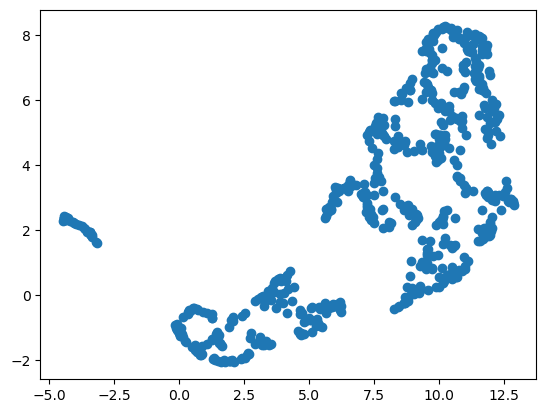

In [9]:
feature_columns = ['u', 'g', 'r', 'i', 'z']
import umap

feature_data = features[feature_columns].to_numpy()
# handle nan values
feature_data = np.nan_to_num(feature_data)

# fit umap on feature_columns
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_model.fit(feature_data)

# transform the data
umap_result = umap_model.transform(feature_data)
plt.scatter(umap_result[:, 0], umap_result[:, 1])








In [10]:
# Cluster the data using kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(umap_result)

# Add the cluster labels to the features dataframe
features['cluster'] = kmeans.labels_


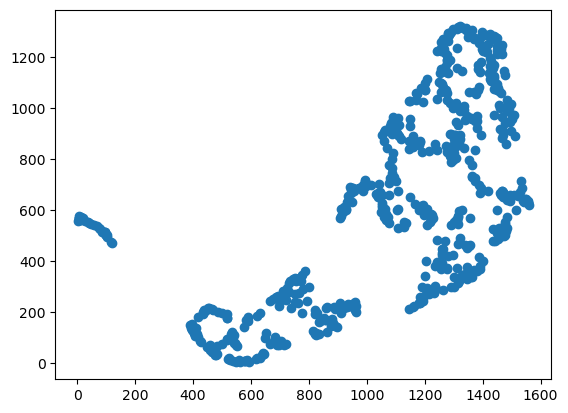

In [11]:
# X range,
x_range = features["X_centroid"].min(), features["X_centroid"].max()
y_range = features["Y_centroid"].min(), features["Y_centroid"].max()
# Scale umap_result to x_range and y_range
umap_result = (umap_result - umap_result.min(axis=0)) / (umap_result.max(axis=0) - umap_result.min(axis=0))
umap_result[:, 0] = 0.9* umap_result[:, 0] * (x_range[1] - x_range[0]) + x_range[0]
umap_result[:, 1] = 0.9 *umap_result[:, 1] * (y_range[1] - y_range[0]) + y_range[0]


plt.scatter(umap_result[:, 0], umap_result[:, 1])

features['UMAP_X'] = umap_result[:, 0]
features['UMAP_Y'] = umap_result[:, 1]
# save
features.to_csv('/Users/swarchol/Research/seal/data/astro/updated_astro.csv', index=False)









In [12]:
import dask.array as da
image_array = image_array.astype(np.uint16)
# SCALE values to 0-65535
image_array = image_array / np.max(image_array) * 65535
image_array = image_array.astype(np.uint16)
# convert image_array to dask array
image_array = da.from_array(image_array)
# make this a uint16 array


/var/folders/ps/x7v31pds3gn4t11djwg0t03h0000gp/T/ipykernel_79882/2730560024.py:2: RuntimeWarning: invalid value encountered in cast
  image_array = image_array.astype(np.uint16)


In [13]:
palom.pyramid.write_pyramid(
    mosaics=[
        image_array
    ],
    output_path=r"/Users/swarchol/Research/seal/data/astro/astro.ome.tif", 
    downscale_factor=2,
    channel_names=['u', 'g', 'r', 'i', 'z']
)

2025-03-12 17:23:46.187 | INFO     | palom.pyramid:write_pyramid:166 - Writing to /Users/swarchol/Research/seal/data/astro/astro.ome.tif


Assembling mosaic  1/ 1 (channel  1/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  2/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  3/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  4/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  5/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

2025-03-12 17:23:46.487 | INFO     | palom.pyramid:write_pyramid:182 - Generating pyramid
2025-03-12 17:23:46.488 | INFO     | palom.pyramid:write_pyramid:185 -     Level 1 (1023 x 1203)
Processing channel: 100%|##########| 5/5 [00:00<00:00,  7.77it/s]
2025-03-12 17:23:47.137 | INFO     | palom.pyramid:write_pyramid:185 -     Level 2 (512 x 602)
Processing channel: 100%|##########| 5/5 [00:00<00:00,  9.02it/s]


In [14]:
# Write 
image_array

dask.array<array, shape=(5, 2045, 2406), dtype=uint16, chunksize=(5, 2045, 2406), chunktype=numpy.ndarray>

In [15]:
np.max(image_array.compute())

65535

In [16]:
from ome_types import from_tiff
from tifffile import tiffcomment

file_name= r"/Users/swarchol/Research/seal/data/astro/astro.ome.tif"
xml = from_tiff(file_name)
channel_names = ['u', 'g', 'r', 'i', 'z']
for i in range(len(xml.images[0].pixels.channels)):
    # 
    xml.images[0].pixels.channels[i].name = channel_names[i]

# write this back to the ome-tiff file
ome_xml = xml.to_xml()
# TIFF strings must be 7-bit ASCII
ome_xml = ome_xml.encode('utf-8')
tiffcomment(file_name, ome_xml)



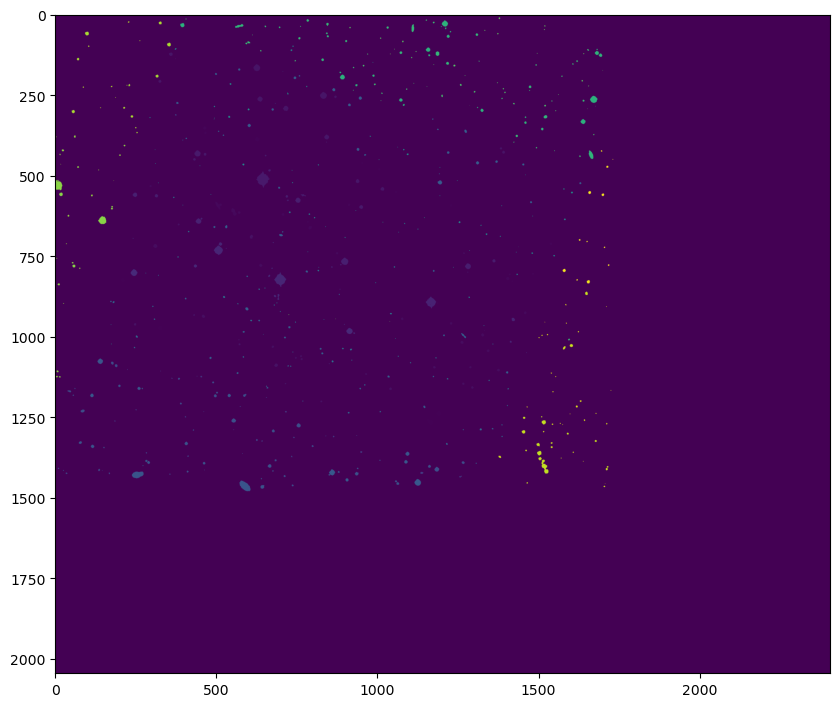

In [48]:
# show seg_masks as a 2d image as figsize 20,20
plt.figure(figsize=(10, 10))
plt.imshow(seg_masks)
plt.show()


In [18]:
seg_mask_da = da.from_array(seg_masks)
# write this to a tiff file with palom
palom.pyramid.write_pyramid(
    mosaics=[
        seg_mask_da
    ],
    is_mask=True,
    output_path=r"/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif", 
    downscale_factor=2,

)

2025-03-12 17:25:50.656 | INFO     | palom.pyramid:write_pyramid:166 - Writing to /Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif


Assembling mosaic  1/ 1 (channel  1/ 1):   0%|          | 0/2 [00:00<?, ?it/s]

2025-03-12 17:25:50.723 | INFO     | palom.pyramid:write_pyramid:182 - Generating pyramid
2025-03-12 17:25:50.740 | INFO     | palom.pyramid:write_pyramid:185 -     Level 1 (1023 x 1203)
Processing channel: 100%|##########| 1/1 [00:00<00:00,  6.44it/s]
2025-03-12 17:25:50.906 | INFO     | palom.pyramid:write_pyramid:185 -     Level 2 (512 x 602)
Processing channel: 100%|##########| 1/1 [00:00<00:00, 10.18it/s]


In [24]:
t1 = palom.reader.OmePyramidReader(r"/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif")
t1.pyramid

[dask.array<reshape, shape=(1, 2045, 2406), dtype=int32, chunksize=(1, 2045, 2406), chunktype=numpy.ndarray>,
 dask.array<reshape, shape=(1, 1023, 1203), dtype=int32, chunksize=(1, 1023, 1203), chunktype=numpy.ndarray>,
 dask.array<reshape, shape=(1, 512, 602), dtype=int32, chunksize=(1, 512, 602), chunktype=numpy.ndarray>]

In [26]:
t2 = palom.reader.OmePyramidReader(r"/Users/swarchol/Research/seal/data/astro/astro.ome.tif")
t2.pyramid

[dask.array<from-zarr, shape=(5, 2045, 2406), dtype=uint16, chunksize=(1, 2045, 2406), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(5, 1023, 1203), dtype=uint16, chunksize=(1, 1023, 1203), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(5, 512, 602), dtype=uint16, chunksize=(1, 512, 602), chunktype=numpy.ndarray>]

In [27]:
image_path = "/Users/swarchol/Research/seal/data/astro/astro.ome.tif"

# segmentation_path = "/mnt/c/Users/simon/Documents/Greg/for_simon/segmentation_mask/WD-76845-097.tif"
segmentation_path = r"/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif"
# csv_path = "/mnt/c/Users/simon/Documents/Greg/for_simon/unmicst-WD-76845-097_cellRing.csv"
csv_path = "/Users/swarchol/Research/seal/data/astro/updated_astro.csv"
dest_path = "/Users/swarchol/Research/seal/data/astro/cut"

In [28]:
img = (tf.TiffFile(image_path, is_ome=False))

In [29]:
# remove existing cut directory
if os.path.exists(dest_path):
    shutil.rmtree(dest_path)
for i in tqdm(range(len(img.pages))):
    sample_path = f"{dest_path}/channel_{i}"
    args = [image_path,
    segmentation_path,
    csv_path,
    sample_path,
    "-p", "8",  # Number of processes
        "--channels", (str(i+1)),  # Specific channels to include
        "--cache-size", str(1024 * 1024 * 1024 * 4),  # Cache size
    ]
    cellcutter.cli.cut(args)
    
    
# Now Create the Mask
sample_path = f"{dest_path}/mask"
args = [image_path,
segmentation_path,
csv_path,
sample_path,
"-p", "8",  # Number of processes
    "--channels", (str(i+1)),  # Specific channels to include
    "--cache-size", str(1024 * 1024 * 1024 * 4),  # Cache size
    "--mask-cells"
    
]
cellcutter.cli.cut(args)
# Remove the mask directory but keep mask_mask
import shutil
shutil.rmtree(f"{dest_path}/mask")
shutil.move(f"{dest_path}/mask_mask", f"{dest_path}/mask")
paths_list = [f"{dest_path}/channel_{i}" for i in range(len(img.pages))]
zarr_list = [zarr.open(path) for path in paths_list]
# remove existing combined zarr
if os.path.exists(dest_path + "/combined"):
    shutil.rmtree(dest_path + "/combined")
combined_store = zarr.DirectoryStore(dest_path + "/combined")# [r.chunks for r in zarr_list]
combined = zarr.create(
            store=combined_store,
            overwrite=True,
            shape=(len(zarr_list), zarr_list[0].shape[1],zarr_list[0].shape[2],zarr_list[0].shape[3]),
            dtype=zarr_list[0].dtype,
            compressor=Blosc(cname="zstd", clevel=2, shuffle=Blosc.SHUFFLE)        )

for i in tqdm(range(len(zarr_list))):
    combined[i,:,:,:] = zarr_list[i][0]


# Remove the individual channel zarrs
for path in paths_list:
    shutil.rmtree(path)

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:root:Namespace(p=8, z=False, force=False, window_size=None, mask_cells=False, channels=[1], cache_size=4294967296, chunk_size=32, cells_per_chunk=None, IMAGE='/Users/swarchol/Research/seal/data/astro/astro.ome.tif', SEGMENTATION_MASK='/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif', CELL_DATA='/Users/swarchol/Research/seal/data/astro/updated_astro.csv', DESTINATION='/Users/swarchol/Research/seal/data/astro/cut/channel_0')
INFO:root:Loading cell data
INFO:root:Check if all cell IDs from the CSV are represented in the segmentation mask
INFO:root:Remove cells from segmentation mask that are not present in the CSV
INFO:root:Finding window size
INFO:root:Window size automatically set to (53, 53)
INFO:root:Found 619 cells
INFO:root:Using chunks of shape (1, 5972, 53, 53)
INFO:root:Writing thumbnails to /Users/swarchol/Research/seal/data/astro/cut/channel_0
INFO:root:Image size (9 MB) is smaller than cache size (4294967296 MB). Loading entire image into memory.
INFO:roo

  0%|          | 0/5 [00:00<?, ?it/s]

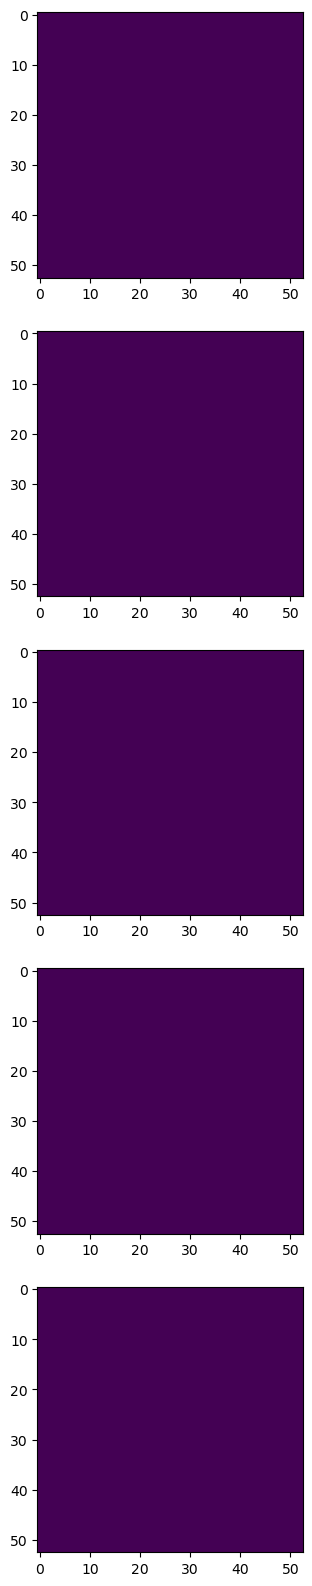

In [30]:
# this is (5, 619, 53, 53) , plot a random cell, 5 channels as subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
for i in range(5):
    axs[i].imshow(combined[i, 12, :, :])
plt.show()


In [31]:
# Generate New Images
TILE_SIZE = 1024
DOWNSCALE_FACTOR = 2
MAX_PYRAMID_IMG_SIZE = 1024
from scipy.spatial import cKDTree
from tqdm import tqdm
import tifffile
from loguru import logger
import math
import tempfile
import shutil
SEGMENTATION_PATH = "/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif"
CSV_PATH = "/Users/swarchol/Research/seal/data/astro/updated_astro.csv"
IMAGE_PATH = "/Users/swarchol/Research/seal/data/astro/astro.ome.tif"
IM_STORE = zarr.DirectoryStore('~/imstor')
SEG_STORE = zarr.DirectoryStore('~/segstor')
CUT_SEG_CELLS_PATH = "/Users/swarchol/Research/seal/data/astro/cut/mask"
CUT_CELLS_PATH = "/Users/swarchol/Research/seal/data/astro/cut/combined"
OUTPUT_TIFF_PATH = "/Users/swarchol/Research/seal/data/astro/tiled.ome.tif"
OUTPUT_SEGMENTATION_PATH = "/Users/swarchol/Research/seal/data/astro/tiled-mask.ome.tif"
CSV_WRITE_PATH = "/Users/swarchol/Research/seal/data/astro/updated_astro.csv"


In [32]:




def create_non_occlusive_zarr(
    im_zarr_tiled,seg_zarr_tiled, cut_cells, cut_masks, csv_df
):
    # Create list of all indices of cells in cut_cells
    cell_indices = np.arange(cut_masks.shape[0])
    np.random.seed(0)
    np.random.shuffle(cell_indices)
    for z in tqdm(range(len(im_zarr_tiled))):
        height, width = im_zarr_tiled[z].shape[-2:]
        scale_factor = 2**z

        # Pre-allocate the entire level
        seg_level_data = zarr.zeros((height, width), dtype=np.uint32)
        image_level_data = zarr.zeros(
            (im_zarr_tiled[z].shape[0], height, width), dtype=np.uint16
        )
        binary_mask = np.zeros((height, width), dtype=np.uint8)

        for cell_index in tqdm(cell_indices):
            # Retrieve cell row
            cell_row = csv_df.loc[csv_df["CellID"] == cell_index]
            if cell_row.empty:
                continue
            cell_location = cell_row[["UMAP_X", "UMAP_Y"]].values.flatten()

            # Adjust cell_location to place the cell's center at the centroid
            cell_center_offset = (cut_masks.shape[-2] // 2, cut_masks.shape[-1] // 2)
            cell_location = ((cell_location / scale_factor) - cell_center_offset).astype(int)
            
            # Ensure cell_location does not go below 0
            cell_location = np.maximum(cell_location, 0)

            cell_x_range = min(cell_location[0] + cut_masks.shape[-2], width)
            cell_y_range = min(cell_location[1] + cut_masks.shape[-1], height)

            # Calculate slicing based on truncated ranges
            cell_slice_x = slice(cell_location[0], cell_x_range)
            cell_slice_y = slice(cell_location[1], cell_y_range)
            cut_cell_slice_x = slice(0, cell_x_range - cell_location[0])
            cut_cell_slice_y = slice(0, cell_y_range - cell_location[1])

            # Check if adding this cell to the binary mask will create a value over 1
            binary_check = (
                binary_mask[cell_slice_y, cell_slice_x]
                + cut_masks[cell_index, cut_cell_slice_y, cut_cell_slice_x]
            )
            if np.any(binary_check > 1):
                continue
            binary_mask[cell_slice_y, cell_slice_x] = binary_check

            seg_level_data[cell_slice_y, cell_slice_x] += (
                cut_masks[cell_index][cut_cell_slice_y, cut_cell_slice_x]
                * (cell_row["CellID"].values[0])
            ).astype(np.uint32)
            masked_cell = cut_masks[cell_index] * cut_cells[:, cell_index, :, :]
            image_level_data[:, cell_slice_y, cell_slice_x] += masked_cell[
                :, cut_cell_slice_y, cut_cell_slice_x
            ]

        im_zarr_tiled[z] = image_level_data
        seg_zarr_tiled[z] = seg_level_data
    return im_zarr_tiled, seg_zarr_tiled



In [33]:
# Load data
imgio = tifffile.TiffFile(IMAGE_PATH, is_ome=False)
im_zarr = zarr.open(imgio.series[0].aszarr())

segio = tifffile.TiffFile(SEGMENTATION_PATH, is_ome=False)
seg_zarr = zarr.open(segio.series[0].aszarr())

# Create temporary directories for Zarr stores

zarr.convenience.copy_store(im_zarr.store, IM_STORE, if_exists="replace")
zarr.convenience.copy_store(seg_zarr.store, SEG_STORE, if_exists="replace")

im_zarr_tiled = zarr.open(IM_STORE)
seg_zarr_tiled = zarr.open(SEG_STORE)

# if .parquet file is used, use pd.read_parquet instead
if CSV_PATH.endswith(".parquet"):
    csv_df = pd.read_parquet(CSV_PATH)
else:
    csv_df = pd.read_csv(CSV_PATH)
try:
    embedding = csv_df[["UMAP_X", "UMAP_Y"]].values
except:
    embedding = csv_df[["emb1", "emb2"]].values

embedding[:, 0] -= embedding[:, 0].min()
embedding[:, 1] -= embedding[:, 1].min()
embedding[:, 0] = embedding[:, 0] / embedding[:, 0].max()
embedding[:, 1] = embedding[:, 1] / embedding[:, 1].max()
embedding[:, 0] = embedding[:, 0] * im_zarr_tiled[0].shape[-1]
embedding[:, 1] = embedding[:, 1] * im_zarr_tiled[0].shape[-2]
csv_df["UMAP_X"] = embedding[:, 0]
csv_df["UMAP_Y"] = embedding[:, 1]
# Write embedding to csv
csv_df.to_csv(CSV_WRITE_PATH, index=False)
print(csv_df.shape)
tree = cKDTree(embedding)
# print(im_zarr_tiled[0].shape[-2:])

# Load cut cells
cut_seg_cells = zarr.open(CUT_SEG_CELLS_PATH)
cut_cells = zarr.open(CUT_CELLS_PATH)
# # # Process segmentation
im_zarr_tiled,seg_zarr_tiled = create_non_occlusive_zarr(
    im_zarr_tiled,seg_zarr_tiled, cut_cells, cut_seg_cells, csv_df
)


(619, 26)


100%|██████████| 3/3 [00:12<00:00,  4.06s/it]


In [34]:
csv_df.columns


Index(['objid', 'run', 'rerun', 'camcol', 'field', 'obj', 'type', 'ra', 'dec',
       'u', 'g', 'r', 'i', 'z', 'Err_u', 'Err_g', 'Err_r', 'Err_i', 'Err_z',
       'temp_index', 'CellID', 'X_centroid', 'Y_centroid', 'cluster', 'UMAP_X',
       'UMAP_Y'],
      dtype='object')

In [35]:
import dask
dask.array.from_zarr(im_zarr_tiled[0])

dask.array<from-zarr, shape=(5, 2045, 2406), dtype=uint16, chunksize=(2, 512, 602), chunktype=numpy.ndarray>

In [36]:
seg_mask_da = da.from_array(seg_masks)
# write this to a tiff file with palom
palom.pyramid.write_pyramid(
    mosaics=[
        dask.array.from_zarr(im_zarr_tiled[0])
    ],
    # is_mask=True,
    output_path=r"/Users/swarchol/Research/seal/data/astro/hybrid.ome.tif", 
        downscale_factor=2,

)

2025-03-12 17:29:48.594 | INFO     | palom.pyramid:write_pyramid:166 - Writing to /Users/swarchol/Research/seal/data/astro/hybrid.ome.tif


Assembling mosaic  1/ 1 (channel  1/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  2/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  3/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  4/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  5/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

2025-03-12 17:29:48.716 | INFO     | palom.pyramid:write_pyramid:182 - Generating pyramid
2025-03-12 17:29:48.717 | INFO     | palom.pyramid:write_pyramid:185 -     Level 1 (1023 x 1203)
Processing channel: 100%|##########| 5/5 [00:00<00:00,  6.93it/s]
2025-03-12 17:29:49.442 | INFO     | palom.pyramid:write_pyramid:185 -     Level 2 (512 x 602)
Processing channel: 100%|##########| 5/5 [00:00<00:00, 10.26it/s]


In [37]:
seg_mask_da = da.from_array(seg_masks)
# write this to a tiff file with palom
palom.pyramid.write_pyramid(
    mosaics=[
        dask.array.from_zarr(seg_zarr_tiled[0])
    ],
    is_mask=True,
    output_path=r"/Users/swarchol/Research/seal/data/astro/hybrid.mask.ome.tif", 
        downscale_factor=2,

)

2025-03-12 17:29:50.361 | INFO     | palom.pyramid:write_pyramid:166 - Writing to /Users/swarchol/Research/seal/data/astro/hybrid.mask.ome.tif


Assembling mosaic  1/ 1 (channel  1/ 1):   0%|          | 0/64 [00:00<?, ?it/s]

2025-03-12 17:29:50.466 | INFO     | palom.pyramid:write_pyramid:182 - Generating pyramid
2025-03-12 17:29:50.466 | INFO     | palom.pyramid:write_pyramid:185 -     Level 1 (1023 x 1203)
Processing channel: 100%|##########| 1/1 [00:00<00:00,  9.25it/s]
2025-03-12 17:29:50.577 | INFO     | palom.pyramid:write_pyramid:185 -     Level 2 (512 x 602)
Processing channel: 100%|##########| 1/1 [00:00<00:00, 10.78it/s]


## Compute Shap Values


In [38]:
csv_df = pd.read_csv(CSV_WRITE_PATH)
csv_df

objid   run  rerun  camcol  field   obj  type          ra  \
0    1237651212288720902  1336    301       3     77     6     6  260.097556   
1    1237651212288720905  1336    301       3     77     9     6  260.034837   
2    1237651212288720906  1336    301       3     77    10     6  260.048734   
3    1237651212288720907  1336    301       3     77    11     6  260.027857   
4    1237651212288720908  1336    301       3     77    12     6  260.038059   
..                   ...   ...    ...     ...    ...   ...   ...         ...   
614  1237651225710559756  1339    301       4     78   524     3  260.242176   
615  1237651225710559779  1339    301       4     78   547     6  260.268424   
616  1237651225710559800  1339    301       4     78   568     6  260.250528   
617  1237651225710559801  1339    301       4     78   569     6  260.265027   
618  1237651225710560254  1339    301       4     78  1022     6  260.271909   

           dec         u  ...     Err_r     Err_i     Err_z  temp_index  \
0    55.411202  19.07824  ...  0.005769  0.006511  0.017307           1   
1    55.392044  14.87881  ...  0.008572  0.001381  0.007471           2   
2    55.386783  17.31924  ...  0.003405  0.003420  0.004900           3   
3    55.386657  23.95996  ...  0.029092  0.014071  0.026140           4   
4    55.395994  23.73612  ...  0.185996  0.239250  0.082442           5   
..         ...       ...  ...       ...       ...       ...         ...   
614  55.340507  22.83575  ...  0.030610  0.031856  0.106464        1583   
615  55.333571  24.00519  ...  0.027581  0.023445  0.071741        1584   
616  55.322353  22.66847  ...  0.033250  0.035865  0.106556        1585   
617  55.325060  23.76940  ...  0.031334  0.027191  0.081145        1586   
618  55.283360  24.89220  ...  0.084628  0.048879  0.130993        1601   

     CellID   X_centroid   Y_centroid  cluster       UMAP_X       UMAP_Y  
0         1  1082.111111  1286.365079        2   890.492002     7.313083  
1         2   849.033364  1160.889713        4     8.544299   879.489221  
2         3   899.950311  1127.559006        4   151.484705   774.892148  
3         4   823.000000  1126.571429        0  1666.943837  1422.486533  
4         5   861.333333  1187.666667        8  2261.679884  1931.157486  
..      ...          ...          ...      ...          ...          ...  
614    1583  1620.437500   824.625000        9  1871.867753   900.586566  
615    1584  1718.368421   778.789474        5  1905.993294  1329.979695  
616    1585  1651.384615   705.615385        9  2024.774906   865.727905  
617    1586  1705.600000   723.600000        5  1964.332344  1315.594475  
618    1601  1731.500000   450.500000        8  2183.456942  1990.124541  

[619 rows x 26 columns]

In [39]:
columns = csv_df.columns
columns
feature_columns = ['u', 'g', 'r', 'i', 'z']
feature_data = csv_df[feature_columns].to_numpy()

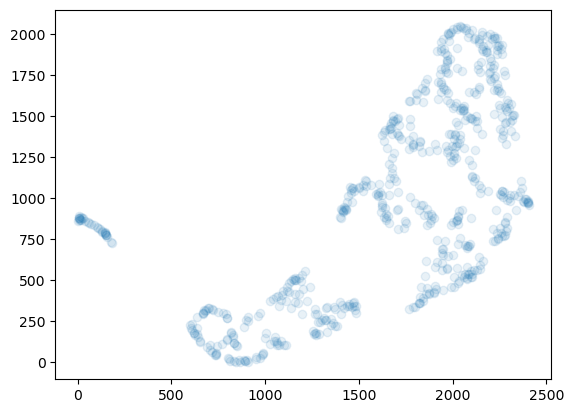

In [40]:
# plt.scatter(csv_df['UMAP_X'], csv_df['UMAP_Y'])
regressor = xgb.XGBRegressor(
                 n_estimators=200,
                 max_depth=5,
                 seed=1000)

regressor.fit(feature_data, csv_df[['UMAP_X','UMAP_Y']])
xgb_preds = regressor.predict(feature_data)
plt.scatter(xgb_preds[:,0], xgb_preds[:,1], alpha=0.1)

In [41]:
explainer = shap.Explainer(regressor)
shap_values = explainer(feature_data)
shap_values = np.abs(shap_values.values)
alphabetical_features = sorted(feature_columns)
indices = [feature_columns.index(feature) for feature in alphabetical_features]
indices
# shap_values = shap_values[:, alphabetical_features]
alphabetical_shap_values = shap_values[:, indices]
np.save('astro-shap.npy', alphabetical_shap_values)


In [42]:
shap_values

array([[[ 16.687338 , 590.1161   ],
        [ 11.084427 , 250.73445  ],
        [559.07874  ,  63.32857  ],
        [182.10313  ,  16.898695 ],
        [  5.8911386,  46.71129  ]],

       [[ 37.438354 , 321.50098  ],
        [438.8202   , 107.31139  ],
        [885.1576   ,  37.52883  ],
        [233.25826  ,  28.88013  ],
        [ 39.622684 ,  53.649048 ]],

       [[ 24.359186 , 342.84982  ],
        [399.87643  ,  88.98372  ],
        [829.6333   ,   5.719804 ],
        [217.46587  ,   9.993648 ],
        [ 20.75664  ,  39.16898  ]],

       ...,

       [[ 20.981762 , 139.4361   ],
        [ 38.003952 ,  33.795967 ],
        [231.83853  ,   8.021018 ],
        [ 73.04426  ,   5.9873543],
        [ 17.17173  ,   5.997807 ]],

       [[  1.3314308, 309.46918  ],
        [ 55.35788  ,  45.580368 ],
        [224.26701  ,   6.970718 ],
        [ 47.30008  ,   7.1845403],
        [  4.6250224,   3.6442077]],

       [[ 21.264294 , 660.65393  ],
        [ 98.57428  , 263.4137   ],
     

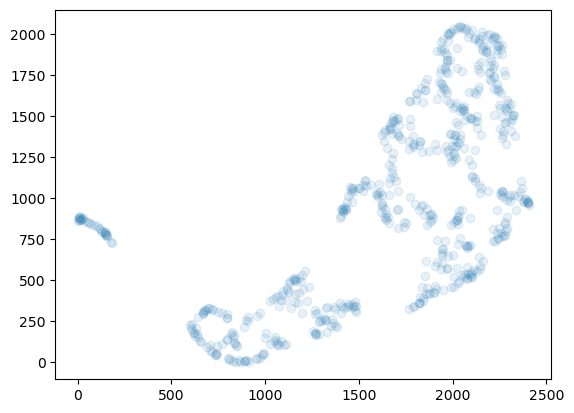

In [43]:

points = csv_df[['UMAP_X', 'UMAP_Y']]

# plot the points
plt.scatter(points['UMAP_X'], points['UMAP_Y'], alpha=0.1)
plt.show()






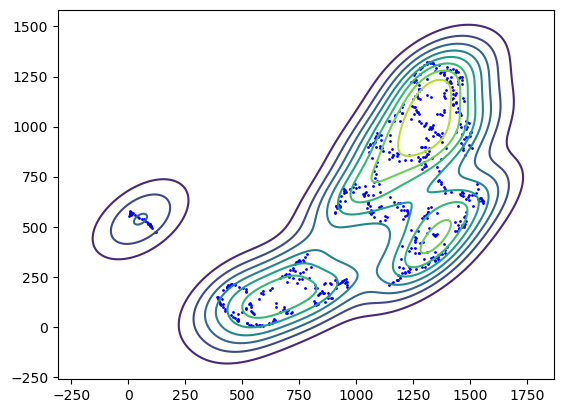

In [ ]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st

# data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 400)
x = features['UMAP_X']
y = features['UMAP_Y']
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

# Expand the area to ensure contours are complete
xmin_expanded = xmin - (xmax - xmin) * 0.2  # 10% expansion on both sides
xmax_expanded = xmax + (xmax - xmin) * 0.2
ymin_expanded = ymin - (ymax - ymin) * 0.2
ymax_expanded = ymax + (ymax - ymin) * 0.2

# Peform the kernel density estimate with expanded area
xx, yy = np.mgrid[xmin_expanded:xmax_expanded:1024j, ymin_expanded:ymax_expanded:1024j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
import matplotlib.contour as mcontour
fig, ax = plt.subplots()
contours = ax.contour(xx, yy, f, filled=False, levels=np.linspace(f.min(), f.max(), 10))
# plot the scatterplot of the points
plt.scatter(x, y, c='blue', s=1)
contour_lines = []
contours.allsegs
for seg in contours.allsegs:
    for line in seg:
        contour_lines.append(line.tolist())


In [45]:
from shapely.geometry import Point, Polygon, MultiPoint
import numpy as np
from tqdm import tqdm

# Convert the points DataFrame into a NumPy array for efficient processing
point_coords = points[['UMAP_X', 'UMAP_Y']].values
multipoints = MultiPoint(point_coords)

# Preallocate the list
points_in_contours = np.zeros(len(contour_lines), dtype=int)

for i, contour in enumerate(tqdm(contour_lines)):
    if len(contour) < 4:
        continue  # Skip small contours

    polygon = Polygon(contour)
    
    # Efficiently check which points are inside the polygon
    points_in_contours[i] = sum(polygon.contains(Point(x, y)) for x, y in point_coords)

# Convert back to list if needed
points_in_contours = points_in_contours.tolist()

100%|██████████| 18/18 [00:00<00:00, 171.36it/s]


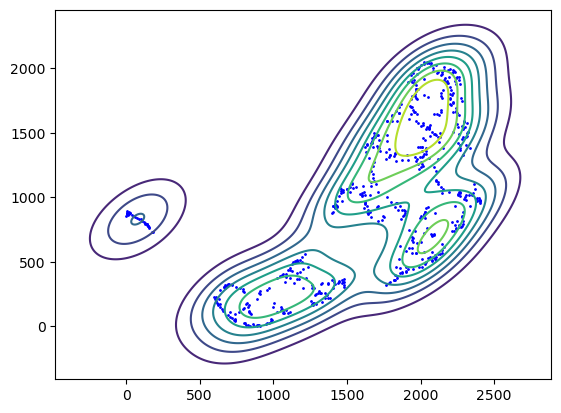

In [46]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st

# data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 400)
x = csv_df['UMAP_X']
y = csv_df['UMAP_Y']
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

# Expand the area to ensure contours are complete
xmin_expanded = xmin - (xmax - xmin) * 0.2  # 10% expansion on both sides
xmax_expanded = xmax + (xmax - xmin) * 0.2
ymin_expanded = ymin - (ymax - ymin) * 0.2
ymax_expanded = ymax + (ymax - ymin) * 0.2

# Peform the kernel density estimate with expanded area
xx, yy = np.mgrid[xmin_expanded:xmax_expanded:1024j, ymin_expanded:ymax_expanded:1024j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
import matplotlib.contour as mcontour
fig, ax = plt.subplots()
contours = ax.contour(xx, yy, f, filled=False, levels=np.linspace(f.min(), f.max(), 10))
# plot the scatterplot of the points
plt.scatter(x, y, c='blue', s=1)
contour_lines = []
contours.allsegs
for seg in contours.allsegs:
    for line in seg:
        contour_lines.append(line.tolist())

# Pickle the contour_lines
with open('/Users/swarchol/Research/seal/data/astro.contour.pkl', 'wb') as f:
    pickle.dump(contour_lines, f)
